In [ ]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/Skillnest/ML/CORES/dataset1.csv"
df = pd.read_csv(path)

In [ ]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Verificar valores nulos
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# Porcentaje de nulos por columna
porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100

# Mostrar en forma de tabla
porcentaje_nulos = porcentaje_nulos.round(2).reset_index()
porcentaje_nulos.columns = ["Columna", "Porcentaje de Nulos"]
porcentaje_nulos

,Columna,Porcentaje de Nulos
0,Age,0.0
1,Sex,0.0
2,ChestPainType,0.0
3,RestingBP,0.0
4,Cholesterol,0.0
5,FastingBS,0.0
6,RestingECG,0.0
7,MaxHR,0.0
8,ExerciseAngina,0.0
9,Oldpeak,0.0


No existen valores nulos, ni duplicados.

In [ ]:
# Tipo de datos por columna
df.dtypes.value_counts()

,count
int64,6
object,5
float64,1


In [ ]:
# Cantidad de valores unicos por columna
print("\nCantidad de valores únicos por columna:")
print(df.nunique())



Cantidad de valores únicos por columna:
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [ ]:
# Verificar filas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# Descripción de variables numéricas
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


Análisis Estadístico de Variables Numéricas
Age (Edad)
Media: 53.5 años, mediana: 54, lo que indica una distribución bastante simétrica.
Rango: de 28 a 77 años.
La mayoría de los pacientes tienen entre 47 y 60 años.
Se trata de una población mayoritariamente adulta o adulta mayor, lo cual es esperable en estudios de enfermedades cardíacas.


RestingBP
Media: 132 mmHg, ligeramente por encima del valor normal (menor a 120).
Mínimo: 0, lo cual no es un valor fisiológicamente válido, posible error de registro.
Rango típico: entre 120 y 140 mmHg.
Aunque la mayoría tiene presión entre lo esperado, el valor mínimo sugiere un posible dato anómalo o faltante introducido como 0.

Cholesterol
Media: 198.8 mg/dL (valor dentro de lo normal), pero con una alta desviación estándar de 109.4.
Mínimo: 0 mg/dL  también inválido fisiológicamente, otro caso de posible error o valor faltante.
Percentiles 25 a 75: entre 173 y 267, lo que indica que muchos pacientes tienen colesterol elevado.
Hay posibles registros inválidos (colesterol 0) y una alta variabilidad, lo que puede influir mucho en modelos predictivos si no se trata.

FastingBS
Variable binaria (0 = no, 1 = sí).
Promedio: 0.23 indica que solo ~23%.

MaxHR
Media: 136.8 lpm.
Rango: 60 a 202.
Percentiles 25 a 75: entre 120 y 156, bastante disperso.


Oldpeak
Media: 0.89, pero con valores tan bajos como -2.6
Máximo: 6.2.
IQR: 0.0 a 1.5 la mayoría tiene valores bajos, pero hay valores extremos.

HeartDisease (Enfermedad cardíaca: 0 = no, 1 = sí)
Media: 0.55 significa que un 55% de los pacientes tiene enfermedad cardíaca.
Mediana = 1, lo que confirma que hay ligero desbalance hacia la clase positiva (enfermos).

In [ ]:
# Descripción de variables categóricas
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


 Análisis de Variables Categóricas
Sex (Sexo)
Valores únicos: 2 (M y F).
Valor más frecuente: M (masculino), con 725 registros.
Aproximadamente 79% de los pacientes son hombres, lo que indica un desbalance de género en la muestra. Esto es importante porque el riesgo de enfermedad cardíaca puede diferir entre sexos.

ChestPainType (Tipo de Dolor en el Pecho)
Valores únicos: 4 (ASY, NAP, ATA, TA).
Valor más frecuente: ASY (Asintomático), con 496 casos.
Más de la mitad de los pacientes no presenta dolor típico.

RestingECG (Resultado del ECG en reposo)
Valores únicos: 3 (Normal, ST, LVH).
Valor más frecuente: Normal, con 552 registros.
Aunque la mayoría tiene un electrocardiograma normal.

ExerciseAngina (Angina inducida por ejercicio)
Valores únicos: 2 (Y, N).
Valor más frecuente: N (sin angina), con 547 registros.
La mayoría no presentó angina durante ejercicio.

ST_Slope (Pendiente del segmento ST en ECG)
Valores únicos: 3 (Up, Flat, Down).
Valor más frecuente: Flat, con 460 casos.
La pendiente Flat del ST puede estar asociada a mayor riesgo cardíaco.



In [ ]:
# Gráfico Pie Chart para tipo de dolor en el pecho
fig = px.pie(
    df,
    names="ChestPainType",
    title="Distribución por tipo de dolor en el pecho",
    hole=0.3
)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title_font_size=18)
fig.show()

La mayoría de los pacientes no presentó síntomas típicos de dolor en el pecho (ASY del 54%). Esto es clínicamente relevante, ya que sugiere que más de la mitad de los casos con enfermedad cardíaca podrían no manifestar señales evidentes, dificultando la detección temprana.

In [ ]:
# Histograma de edad por sexo
fig = px.histogram(
    df,
    x="Age",
    color="Sex",
    nbins=20,
    title="Distribución de Edad por Sexo"
)
fig.update_layout(bargap=0.1, title_font_size=18)
fig.show()

Predominio masculino: La barra azul tiene más frecuencia en casi todos los rangos de edad, confirmando que la mayoría de los pacientes son hombres.

Distribución similar en edades: Ambos sexos tienen una distribución de edad relativamente parecida, con mayor concentración en el rango de 45 a 65 años.

Menor cantidad de mujeres: Las barras naranjas son considerablemente menos numerosas, lo que indica un desbalance en la muestra.

In [ ]:
# Box plot edad por tipo de dolor en el pecho
fig = px.box(
    df,
    x="ChestPainType",
    y="Age",
    color="ChestPainType",
    title="Distribución de Edad por Tipo de Dolor en el Pecho",
    points="all"  # Muestra todos los puntos (útil para ver outliers)
)
fig.update_layout(title_font_size=18)
fig.show()

La mediana de edad es bastante similar entre los grupos, rondando entre los 50 y 55 años.

Los grupos con tipo de dolor ASY y ATA presentan rangos de edad más amplios y algunos valores extremos, evidenciados por puntos aislados.

Los pacientes con dolor TA y NAP parecen concentrarse en rangos de edad ligeramente más estrechos.

In [ ]:
#  Análisis de correlación y mapa de calor

# Para calcular la matriz de correlación, necesito solo las variables númericas, entonces las separare a continuación

cols_numericas = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]

df_numeric = df[cols_numericas]

In [ ]:
# Calcular matriz de correlación con método Pearson

correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


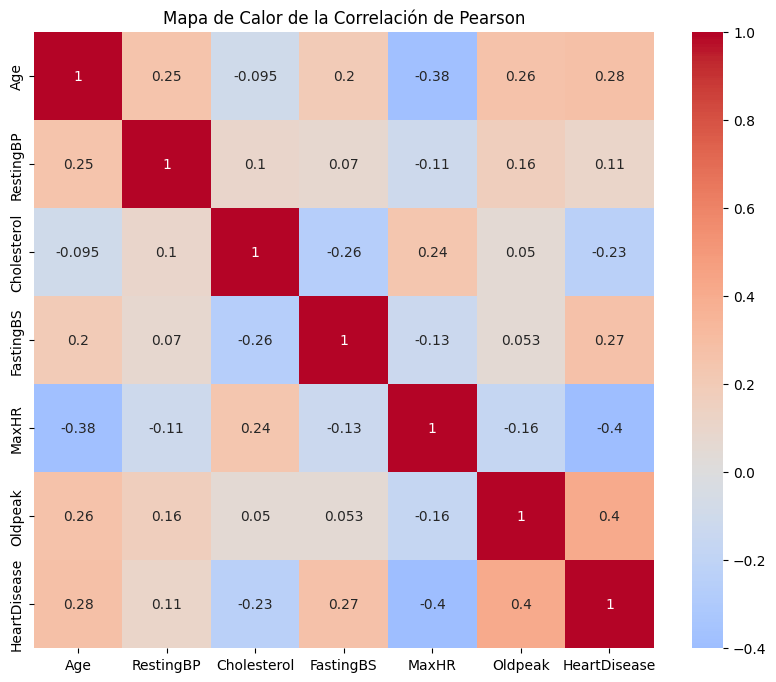

In [ ]:
# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

Valores Nulos
No se detectaron valores nulos en el dataset, según el método df.isna().sum().
Por lo tanto, no es necesario aplicar técnicas de imputación como reemplazo por la media, la mediana o el modo en este caso.

Tratamiento sugerido: Ninguno necesario.

Outliers
Se identificaron posibles outliers en al menos tres variables numéricas:

RestingBP:

Mínimo de 0

Posible tratamiento futuro: reemplazar por NaN y luego imputar, o eliminar si son pocos.

Cholesterol:

Mínimo de 0, también inválido.

Impacto potencial: puede sesgar medidas estadísticas.

Tratamiento sugerido: mismo que anterior, revisar cantidad de casos y decidir si imputar o eliminar.

Oldpeak:

Contiene valores negativos, como -2.6, lo cual puede ser un error.

Impacto: podría alterar los gráficos y modelos si no se revisa.

Recomendación: verificar si los valores negativos son errores o parte del rango esperado clínicamente.

Conclusión
Aunque el dataset no tiene valores nulos declarados, sí existen valores inválidos que deberían tratarse como tales (0 en colesterol y presión).

Los outliers detectados pueden tener un impacto negativo en el análisis si no se manejan adecuadamente.

Resumen de Hallazgos
El dataset contiene 12 variables, de las cuales 7 son numéricas y 5 categóricas.
No se detectaron valores nulos en ninguna de las variables.
Las variables con mayor presencia de outliers detectados son: RestingBP, Cholesterol y Oldpeak, principalmente por valores que no son fisiológicamente válidos (ejemplo: ceros o valores negativos).

Las correlaciones más fuertes se observaron entre Age y MaxHR (negativa) y entre RestingBP y Cholesterol (positiva).

Se identificaron desafíos importantes como:
Datos desbalanceados en la variable objetivo HeartDisease, con un 55% de positivos.

Variables categóricas con alta frecuencia de ciertas categorías, como el predominio de hombres en Sex y de pacientes asintomáticos en ChestPainType.